In [45]:
from sklearn.datasets import fetch_openml
import pandas as pd 
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np
from sympy import *
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error

df=fetch_openml('kin8nm')

c:\Users\ivant\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:320: UserWarning: Multiple active versions of the dataset matching the name kin8nm exist. Versions may be fundamentally different, returning version 1. Available versions:
- version 1, status: active
  url: https://www.openml.org/search?type=data&id=189
- version 2, status: active
  url: https://www.openml.org/search?type=data&id=807

  warn(warning_msg)


In [34]:
print(df.DESCR)

**Author**:   
**Source**: Unknown -   
**Please cite**:   

This is data set is concerned with the forward kinematics of an 8 link
 robot arm. Among the existing variants of this data set we have used
 the variant 8nm, which is known to be highly non-linear and medium
 noisy.

 Original source: DELVE repository of data. 
 Source: collection of regression datasets by Luis Torgo (ltorgo@ncc.up.pt) at
 http://www.ncc.up.pt/~ltorgo/Regression/DataSets.html
 Characteristics: 8192 cases, 9 attributes (0 nominal, 9 continuous).

Downloaded from openml.org.


In [35]:
y=df.target
y

0       0.536524
1       0.308014
2       0.518900
3       0.494151
4       0.470218
          ...   
8187    0.486093
8188    0.696752
8189    0.803888
8190    0.887959
8191    0.496853
Name: y, Length: 8192, dtype: float64

In [36]:
data=df.data
data

,theta1,theta2,theta3,theta4,theta5,theta6,theta7,theta8
0,-0.015119,0.360741,0.469398,1.309675,0.988024,-0.025493,0.664071,0.062763
1,0.360478,-0.301395,0.629183,-1.440146,-0.741637,-1.196749,-1.038444,-0.717461
2,1.563238,-1.294753,0.078987,1.432937,1.149136,-1.292140,1.562988,-0.937731
3,0.199485,0.901157,-1.356304,-0.080525,-0.976628,0.829894,-0.855649,0.930630
4,0.659737,0.120552,-0.008756,0.648839,0.626832,-0.646539,1.318074,-0.899172
...,...,...,...,...,...,...,...,...
8187,1.459523,-0.201551,-0.610721,1.424181,0.269273,1.172781,-0.509818,-0.686006
8188,0.654980,-0.823516,-0.809246,0.408441,-1.368838,0.582222,-1.394697,-0.057294
8189,0.103862,1.024329,-1.047221,0.280905,-0.181155,-0.651934,-1.241842,1.530220
8190,-1.109311,-0.027690,-1.448736,-0.648566,-0.462142,0.814971,1.100615,1.337159


In [37]:
data.shape

(8192, 8)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   theta1  8192 non-null   float64
 1   theta2  8192 non-null   float64
 2   theta3  8192 non-null   float64
 3   theta4  8192 non-null   float64
 4   theta5  8192 non-null   float64
 5   theta6  8192 non-null   float64
 6   theta7  8192 non-null   float64
 7   theta8  8192 non-null   float64
dtypes: float64(8)
memory usage: 512.1 KB


In [39]:
data.isna().sum()

theta1    0
theta2    0
theta3    0
theta4    0
theta5    0
theta6    0
theta7    0
theta8    0
dtype: int64

Пропущеных значений нет


In [40]:
data['theta1'] = data['theta1'].fillna(data['theta1'].median())

C:\Users\ivant\AppData\Local\Temp\ipykernel_36368\166258241.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['theta1'] = data['theta1'].fillna(data['theta1'].median())


<Axes: xlabel='y', ylabel='Count'>

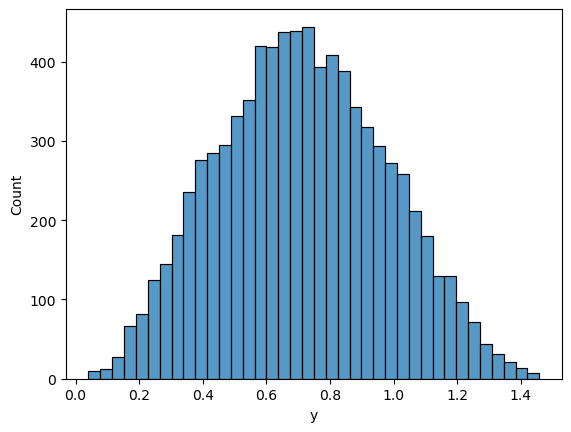

In [41]:
sns.histplot(y)

In [46]:
model=LinearRegression()
model.fit(data,y)
display(model.intercept_)
display(model.coef_)
r2_score(y, model.predict(data))

0.7170300777751232

array([-0.0410125 , -0.025209  , -0.15437193, -0.02535931,  0.07143961,
       -0.04082552, -0.04045395,  0.02071488])

0.4138981536608687